In [1]:
import numpy as np
from reinforcement_learning import EpsilonGreedy

In [2]:
environment = [
    [1.0, 0.0, 0.0],
    [0.3, 0.7, 0.0],
    [0.1, 0.2, 0.7],
]

In [3]:
inventory = EpsilonGreedy(3, 3, environment)

## Train model

In [4]:
def get_reward(mid_state, new_state):
    return 5*(mid_state - new_state) - new_state

In [5]:
for i in range(10000):
    init_state = inventory.state
    action = inventory.choose([k for k in range(len(inventory.actions) - init_state)])
    mid_state = init_state + action
    new_state = inventory.new_state(mid_state)
    reward = get_reward(mid_state, new_state)
    inventory.update(action, reward)
    inventory.state = new_state

In [6]:
inventory.means

array([[0.        , 0.75256223, 0.3960396 ],
       [0.76461337, 0.33884298, 0.        ],
       [0.31378569, 0.        , 0.        ]])

## Test model

In [7]:
import matplotlib.pyplot as plt

In [8]:
def politica_continua(inventory):
    # Reabastece se o estoque for menor que 2
    return len(inventory.actions) - inventory.state - 1


def politica_zerado(inventory):
    return 2 if inventory.state == 0 else 0 # Reabastece apenas se o estoque for 0


def politica_aleatoria(inventory):
    return np.random.choice([k for k in range(len(inventory.actions) - inventory.state)]) # Reabastece aleatoriamente

def politica_model(inventory):
    return inventory.choose_best([k for k in range(len(inventory.actions) - inventory.state)])

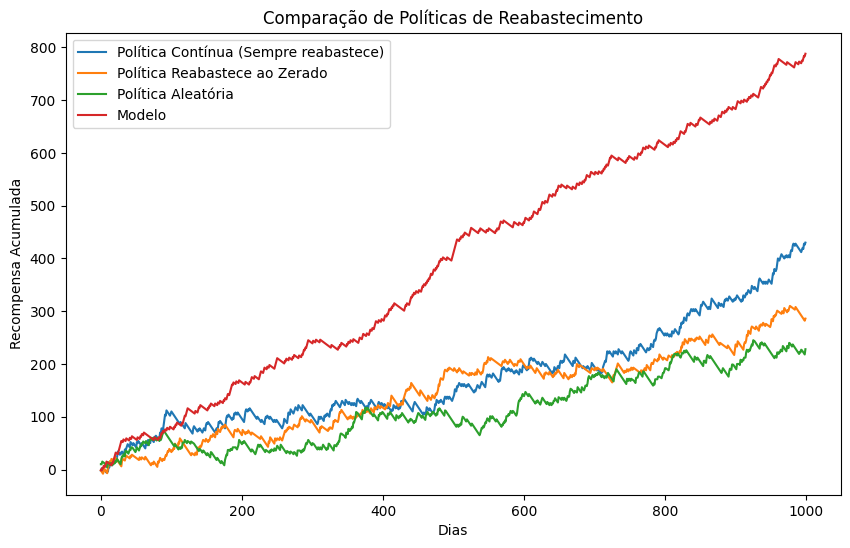

In [9]:
# Simular o ambiente

def simular_politica(inventory, politica, dias=1000):
    rewards = []
    inventory.state = 0

    for _ in range(dias):
        action = politica(inventory)
        mid_state = inventory.state + action
        new_state = inventory.new_state(mid_state)
        reward = get_reward(mid_state, new_state)
        rewards.append(reward)
        inventory.state = new_state

    return np.cumsum(rewards)


# Simular as políticas
dias = 1000
recompensas_continua = simular_politica(inventory, politica_continua, dias)
recompensas_zerado = simular_politica(inventory, politica_zerado, dias)
recompensas_aleatoria = simular_politica(inventory, politica_aleatoria, dias)
model = simular_politica(inventory, politica_model, dias)

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.plot(recompensas_continua, label='Política Contínua (Sempre reabastece)')
plt.plot(recompensas_zerado, label='Política Reabastece ao Zerado')
plt.plot(recompensas_aleatoria, label='Política Aleatória')
plt.plot(model, label='Modelo')
plt.xlabel('Dias')
plt.ylabel('Recompensa Acumulada')
plt.legend()
plt.title('Comparação de Políticas de Reabastecimento')
plt.show()